In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# The Superfund Data has been grouped by county before this script
df = pd.read_csv('Data/Cal1/CalTRI.csv').drop(['Unnamed: 0','Unnamed: 111'],1)

/Users/d/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,17,18,19,24,25,26,27,106) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER,SYS_STSITSSXSOLCHJPSAF7486K4RV,SYS_STSWGMX8O#197_NPUKVK#S5$QM
0,2000,95354CPRBL1706L,110002645415,COOPER B-LINE MODESTO,1706 LAPHAM DR,MODESTO,STANISLAUS,CA,95354,NaN,...,0.0,0.0,50228.0,NaN,NaN,1.21,COOPER INDUSTRIES LTD,1883156.0,16749343122427468607,51833853710530171
1,2000,92633KYSFB2300R,110001174283,DOLCO PACKAGING CORP,2300 RAYMER AVE,FULLERTON,ORANGE,CA,92833,NaN,...,0.0,0.0,21975.0,NaN,NaN,1.00,TEKNI-PLEX CO,NaN,16749343122427468607,18398805745018578606
2,2000,90509MBLLC3700W,110000475263,TORRANCE REFINING CO LLC,3700 W 190TH ST,TORRANCE,LOS ANGELES,CA,90504,NaN,...,0.0,4400.0,4413.0,0.0,NaN,1.00,PBF ENERGY,962619206.0,16749343122427468607,17995881370756980649
3,2000,90509MBLLC3700W,110000475263,TORRANCE REFINING CO LLC,3700 W 190TH ST,TORRANCE,LOS ANGELES,CA,90504,NaN,...,0.0,95.0,325.0,0.0,NaN,1.00,PBF ENERGY,962619206.0,16749343122427468607,17995881370756980649
4,2000,95354CPRBL1706L,110002645415,COOPER B-LINE MODESTO,1706 LAPHAM DR,MODESTO,STANISLAUS,CA,95354,NaN,...,0.0,0.0,5675.0,NaN,NaN,1.21,COOPER INDUSTRIES LTD,1883156.0,16749343122427468607,51833853710530171


In [9]:
df.shape

(73979, 111)

In [10]:
for x in df.columns:
    print(x)

YEAR
TRI_FACILITY_ID
FRS_ID
FACILITY_NAME
STREET_ADDRESS
CITY
COUNTY
ST
ZIP
BIA_CODE
TRIBE
LATITUDE
LONGITUDE
FEDERAL_FACILITY
INDUSTRY_SECTOR_CODE
INDUSTRY_SECTOR
PRIMARY_SIC
SIC_2
SIC_3
SIC_4
SIC_5
SIC_6
PRIMARY_NAICS
NAICS_2
NAICS_3
NAICS_4
NAICS_5
NAICS_6
DOC_CTRL_NUM
CHEMICAL
CAS_#/COMPOUND_ID
SRS_ID
CLEAR_AIR_ACT_CHEMICAL
CLASSIFICATION
METAL
METAL_CATEGORY
CARCINOGEN
FORM_TYPE
UNIT_OF_MEASURE
5.1_FUGITIVE_AIR
5.2_STACK_AIR
5.3_WATER
5.4_UNDERGROUND
5.4.1_UNDERGROUND_CLASS_I
5.4.2_UNDERGROUND_CLASS_II-V
5.5.1_LANDFILLS
5.5.1A_RCRA_C_LANDFILLS
5.5.1B_OTHER_LANDFILLS
5.5.2_LAND_TREATMENT
5.5.3_SURFACE_IMPOUNDMENT
5.5.3A_RCRA_C_SURFACE_IMP.
5.5.3B_Other_SURFACE_IMP.
5.5.4_OTHER_DISPOSAL
ON-SITE_RELEASE_TOTAL
6.1_POTW-TRANSFERS_FOR_RELEASE
6.1_POTW-TRANSFERS_FOR_TREATM.
6.1_POTW-TOTAL_TRANSFERS
6.2_M10
6.2_M41
6.2_M62
6.2_M71
6.2_M81
6.2_M82
6.2_M72
6.2_M63
6.2_M66
6.2_M67
6.2_M64
6.2_M65
6.2_M73
6.2_M79
6.2_M90
6.2_M94
6.2_M99
OFF-SITE_RELEASE_TOTAL
6.2_M20
6.2_M24
6.2_M26
6.2_M28
6

In [17]:
d1 = df.groupby(['PARENT_COMPANY_NAME'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d1.sort_values('ON-SITE_RELEASE_TOTAL', ascending=False, inplace=True)
d1.head()

,PARENT_COMPANY_NAME,ON-SITE_RELEASE_TOTAL
1079,WASTE MANAGEMENT INC,1.811134e+08
194,CLEAN HARBORS INC,9.305866e+07
183,CHEVRON CORP,3.541281e+07
957,TESORO CORP,2.989104e+07
1032,US DEPARTMENT OF DEFENSE,2.642472e+07


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


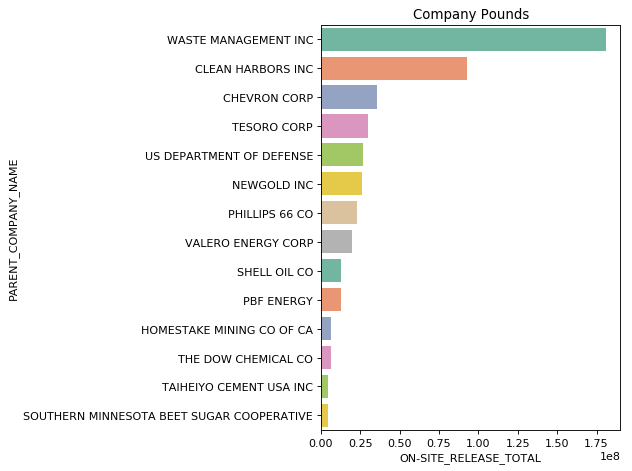

In [26]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Company Pounds')
# d1less = d1[:10]
sns.barplot(x='ON-SITE_RELEASE_TOTAL', y='PARENT_COMPANY_NAME', data=d1[:14], palette='Set2')
plt.tight_layout()

In [27]:
d2 = df.groupby(['CHEMICAL'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d2.sort_values('ON-SITE_RELEASE_TOTAL', ascending=False, inplace=True)
d2.head()

,CHEMICAL,ON-SITE_RELEASE_TOTAL
53,AMMONIA,8.849548e+07
172,LEAD COMPOUNDS,6.266397e+07
212,NITRATE COMPOUNDS,5.838282e+07
59,ASBESTOS (FRIABLE),5.085810e+07
259,STYRENE,3.080761e+07


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


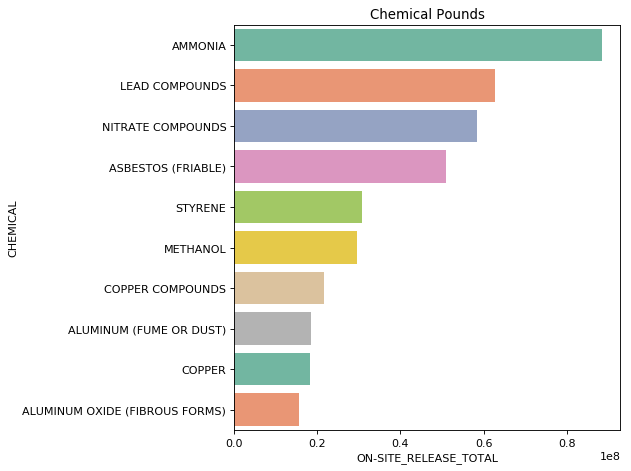

In [32]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Chemical Pounds')
# d1less = d1[:10]
sns.barplot(x='ON-SITE_RELEASE_TOTAL', y='CHEMICAL', data=d2[:10], palette='Set2')
plt.tight_layout()

In [33]:
d3 = df.groupby(['COUNTY'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d3.sort_values('ON-SITE_RELEASE_TOTAL', ascending=False, inplace=True)
d3.head()

,COUNTY,ON-SITE_RELEASE_TOTAL
14,KINGS,1.836206e+08
13,KERN,1.015335e+08
17,LOS ANGELES,9.212987e+07
5,CONTRA COSTA,5.982704e+07
11,IMPERIAL,3.660852e+07


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


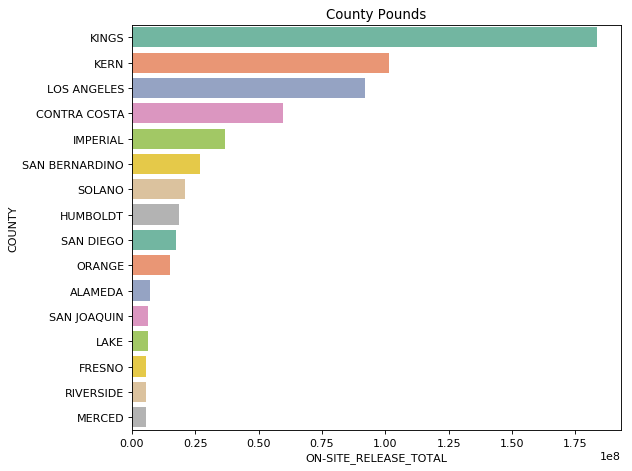

In [35]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('County Pounds')
# d1less = d1[:10]
sns.barplot(x='ON-SITE_RELEASE_TOTAL', y='COUNTY', data=d3[:16], palette='Set2')
plt.tight_layout()

In [37]:
print(len(list(set(df['CHEMICAL']))))
set(df['CHEMICAL'])

295


{'1,1,1,2-TETRACHLOROETHANE',
 '1,1,1-TRICHLOROETHANE',
 '1,1,2-TRICHLOROETHANE',
 '1,1-DICHLORO-1-FLUOROETHANE',
 '1,1-DIMETHYL HYDRAZINE',
 '1,2,4-TRICHLOROBENZENE',
 '1,2,4-TRIMETHYLBENZENE',
 '1,2-BUTYLENE OXIDE',
 '1,2-DIBROMOETHANE',
 '1,2-DICHLOROBENZENE',
 '1,2-DICHLOROETHANE',
 '1,2-DICHLOROETHYLENE',
 '1,2-DICHLOROPROPANE',
 '1,2-DIPHENYLHYDRAZINE',
 '1,3-BUTADIENE',
 '1,3-DICHLOROBENZENE',
 '1,3-DICHLOROPROPYLENE',
 '1,3-PHENYLENEDIAMINE',
 '1,4-DICHLOROBENZENE',
 '1,4-DIOXANE',
 '1-(3-CHLOROALLYL)-3,5,7-TRIAZA-1-AZONIAADAMANTANE CHLORIDE',
 '1-CHLORO-1,1-DIFLUOROETHANE',
 '2,3-DICHLORO-1,1,1,2,3-PENTAFLUOROPROPANE',
 '2,4,6-TRICHLOROPHENOL',
 '2,4-D',
 '2,4-D ISOPROPYL ESTER',
 '2,4-DIMETHYLPHENOL',
 '2,4-DINITROPHENOL',
 '2,4-DINITROTOLUENE',
 '2,6-DINITROTOLUENE',
 '2-ETHOXYETHANOL',
 '2-MERCAPTOBENZOTHIAZOLE',
 '2-METHOXYETHANOL',
 '2-METHYLPYRIDINE',
 '2-NITROPHENOL',
 '2-PHENYLPHENOL',
 "3,3'-DICHLOROBENZIDINE",
 '3,3-DICHLORO-1,1,1,2,2-PENTAFLUOROPROPANE',
 '3-IODO-2-

In [41]:
d4 = df.groupby(['YEAR','CARCINOGEN'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d4.head()

,YEAR,CARCINOGEN,ON-SITE_RELEASE_TOTAL
0,2000,NO,4.842586e+07
1,2000,YES,1.479694e+07
2,2001,NO,3.805733e+07
3,2001,YES,1.547068e+07
4,2002,NO,3.685790e+07


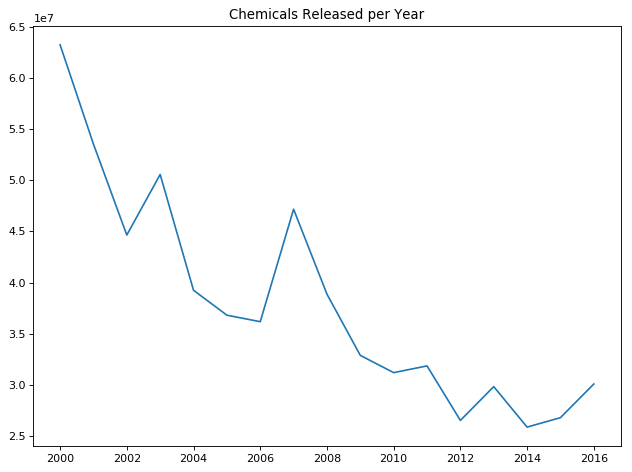

In [44]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Chemicals Released per Year')
plt.plot('YEAR','ON-SITE_RELEASE_TOTAL',data=df.groupby(['YEAR'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index())
plt.tight_layout()

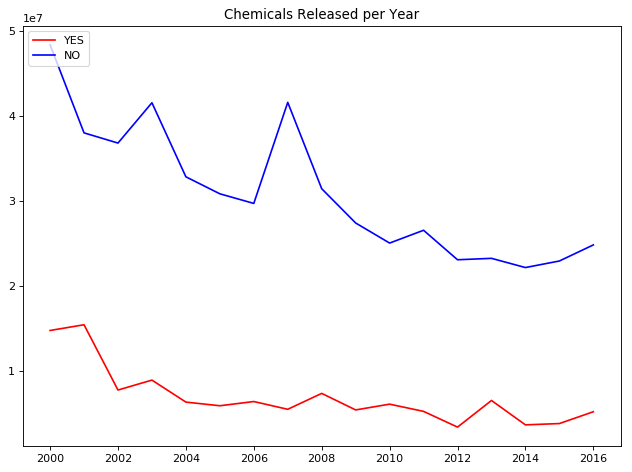

In [42]:
d4no = d4[d4['CARCINOGEN'] == 'NO']
d4yes = d4[d4['CARCINOGEN'] == 'YES']
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Chemicals Released per Year')
plt.plot('YEAR','ON-SITE_RELEASE_TOTAL',data=d4yes,c='red',label='YES')
plt.plot('YEAR','ON-SITE_RELEASE_TOTAL',data=d4no,c='blue',label='NO')
plt.legend(loc='upper left')
plt.tight_layout()

In [6]:
lookup = ['YEAR', 'COUNTY', 'ST', 'FEDERAL_FACILITY', 'INDUSTRY_SECTOR', 
'CLASSIFICATION', 'METAL', 'METAL_CATEGORY', 'CARCINOGEN']
for x in lookup:
    print(x)
    print(len(list(set(df[x]))))
    print(set(df[x]))
    print()

YEAR
17
{2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}

COUNTY
55
{'MARIPOSA', 'VENTURA', 'SANTA CRUZ', 'EL DORADO', 'NAPA', 'STANISLAUS', 'GLENN', 'DEL NORTE', 'SOLANO', 'MERCED', 'CONTRA COSTA', 'RIVERSIDE', 'KINGS', 'MONTEREY', 'MENDOCINO', 'SAN BENITO', 'SAN JOAQUIN', 'IMPERIAL', 'FRESNO', 'BUTTE', 'SACRAMENTO', 'COLUSA', 'NEVADA', 'LAKE', 'CALAVERAS', 'SAN BERNARDINO', 'SHASTA', 'AMADOR', 'SUTTER', 'SIERRA', 'TEHAMA', 'TUOLUMNE', 'SAN FRANCISCO', 'MADERA', 'TULARE', 'SAN MATEO', 'MODOC', 'YUBA', 'PLUMAS', 'KERN', 'MONO', 'ALAMEDA', 'SAN LUIS OBISPO', 'LOS ANGELES', 'INYO', 'LASSEN', 'SANTA CLARA', 'SONOMA', 'SAN DIEGO', 'SISKIYOU', 'ORANGE', 'PLACER', 'SANTA BARBARA', 'HUMBOLDT', 'YOLO'}

ST
1
{'CA'}

FEDERAL_FACILITY
2
{'YES', 'NO'}

INDUSTRY_SECTOR
27
{'Petroleum', 'Nonmetallic Mineral Product', 'Petroleum Bulk Terminals', 'Computers and Electronic Products', 'Wood Products', 'Metal Mining', 'Fabricated Metals', 'Other', 'L

In [7]:
d5 = df.groupby(['INDUSTRY_SECTOR'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d5.sort_values('ON-SITE_RELEASE_TOTAL', ascending=False, inplace=True)
d5.head()

,INDUSTRY_SECTOR,ON-SITE_RELEASE_TOTAL
9,Hazardous Waste,2.771420e+08
17,Petroleum,1.318343e+08
12,Metal Mining,3.344399e+07
15,Other,2.747622e+07
2,Chemicals,2.507082e+07


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


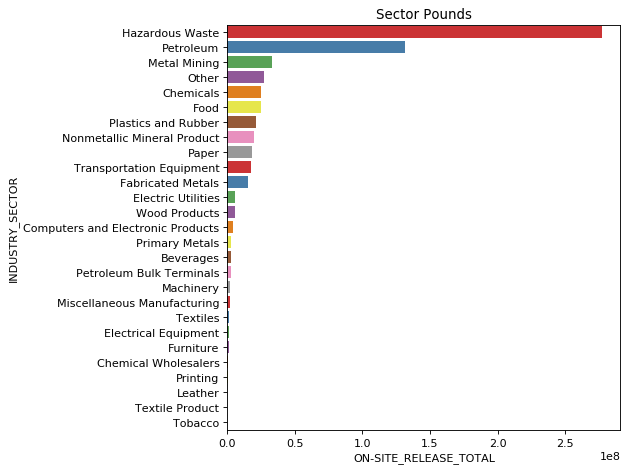

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Sector Pounds')
sns.barplot(x='ON-SITE_RELEASE_TOTAL', y='INDUSTRY_SECTOR', data=d5, palette='Set1')
plt.tight_layout()

In [13]:
d6 = df.groupby(['METAL_CATEGORY'])['ON-SITE_RELEASE_TOTAL'].sum().reset_index()
d6.sort_values('ON-SITE_RELEASE_TOTAL', ascending=False, inplace=True)
d6.head()

,METAL_CATEGORY,ON-SITE_RELEASE_TOTAL
0,0,3.636955e+08
1,1,1.652216e+08
2,2,6.905777e+07
4,4,3.500119e+07
3,3,1.246585e+07


/Users/d/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


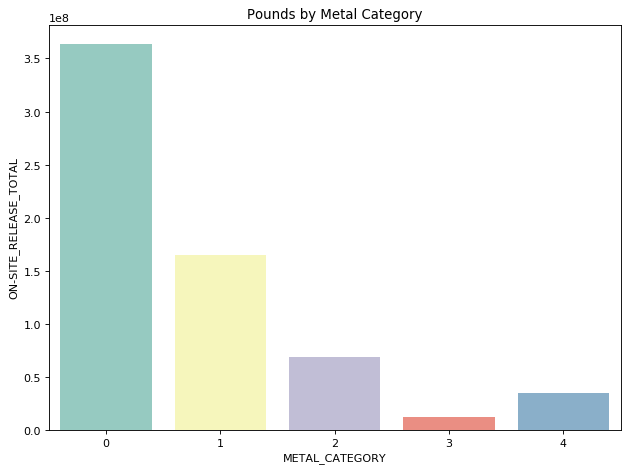

In [17]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Pounds by Metal Category')
sns.barplot(x='METAL_CATEGORY', y='ON-SITE_RELEASE_TOTAL', data=d6, palette='Set3')
plt.tight_layout()